In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.metrics import ndcg_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [2]:
def topK_precision(y_true, y_score, percent):
    # y_true should be rankd, like [0, 1, 2, 3]
    num = int(len(y_true) * percent)
    y_true_num = y_true[:num]
    y_score_num = y_score[:num]
    intersection = list(set(y_true_num) & set(y_score_num))
    return len(intersection) / num

In [3]:
# Zookeeper

In [4]:
project_zookeeper = "Zookeeper"
data_file_zookeeper = project_zookeeper+"ProfileStat.xlsx"

In [5]:
df_zookeeper = pd.read_excel(data_file_zookeeper, sheet_name='WorstCost')

In [6]:
target_result_zookeeper = np.asarray([df_zookeeper["Rank - MaxTime"]])
execution_frequency_result = np.asarray([df_zookeeper["Rank - Frequency"]])
method_calls_result_zookeeper = np.asarray([df_zookeeper["Rank - MethodCalls"]])
potential_method_calls_result_zookeeper = np.asarray([df_zookeeper["Rank - PotentialMethodCall"]])
potential_instructions_result_zookeeper = np.asarray([df_zookeeper["Rank - PotentialInstruction"]])

In [7]:
## Our result

In [8]:
print(spearmanr(df_zookeeper["Rank - MaxTime"], df_zookeeper["Rank - Frequency"]))
print(spearmanr(df_zookeeper["Rank - MaxTime"], df_zookeeper["Rank - MethodCalls"]))
print(spearmanr(df_zookeeper["Rank - MaxTime"], df_zookeeper["Rank - PotentialMethodCall"]))
print(spearmanr(df_zookeeper["Rank - MaxTime"], df_zookeeper["Rank - PotentialInstruction"]))

SpearmanrResult(correlation=0.6729528689157073, pvalue=4.32153139723749e-25)
SpearmanrResult(correlation=0.4247456197207733, pvalue=2.804130213780996e-09)
SpearmanrResult(correlation=0.20383345164974226, pvalue=0.0060596678432274995)
SpearmanrResult(correlation=0.1917013899605955, pvalue=0.009937947073634356)


In [9]:
i = 0.01
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.0
0.0
0.0
0.0


In [10]:
i = 0.05
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.4444444444444444
0.1111111111111111
0.2222222222222222
0.2222222222222222


In [11]:
i = 0.1
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.5
0.2777777777777778
0.2222222222222222
0.2222222222222222


In [12]:
i = 0.2
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.4722222222222222
0.3055555555555556
0.3055555555555556
0.3055555555555556


In [13]:
np.linspace(0.1, 1, num=10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [14]:
frequency_zookeeper = []
method_call_zookeeper = []
potential_method_call_zookeeper = []
potential_instruction_zookeeper = []
for i in np.linspace(0.01, 1.0, num=100):
    frequency_zookeeper.append(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
    method_call_zookeeper.append(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
    potential_method_call_zookeeper.append(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
    potential_instruction_zookeeper.append(topK_precision(df_zookeeper["Rank - MaxTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

In [15]:
plt.style.use('ggplot')
plt.rc('font', family='Times New Roman')
fig, ax = plt.subplots()
ax.plot(np.linspace(0.01, 1.0, num=100), frequency_zookeeper, label="execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_zookeeper, label="potential_method_call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), method_call_zookeeper, label="Number of method call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), potential_instruction_zookeeper, label="Number of potential instruction", linestyle='-')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.legend(loc="lower right")
plt.show()

In [252]:
# Hadoop

In [16]:
project_hadoop = "Hadoop"
data_file_hadoop = project_hadoop+"ProfileStat.xlsx"

In [17]:
df_hadoop = pd.read_excel(data_file_hadoop, sheet_name='WorstCost')

In [18]:
target_result_hadoop = np.asarray([df_hadoop["Rank - MaxTime"]])
execution_frequency_result_hadoop = np.asarray([df_hadoop["Rank - Frequency"]])
method_calls_result_hadoop = np.asarray([df_hadoop["Rank - MethodCalls"]])
potential_method_calls_result_hadoop = np.asarray([df_hadoop["Rank - PotentialMethodCall"]])
potential_instructions_result_hadoop = np.asarray([df_hadoop["Rank - PotentialInstruction"]])

In [19]:
## Our result

In [20]:
print(spearmanr(df_hadoop["Rank - MaxTime"], df_hadoop["Rank - Frequency"]))
print(spearmanr(df_hadoop["Rank - MaxTime"], df_hadoop["Rank - MethodCalls"]))
print(spearmanr(df_hadoop["Rank - MaxTime"], df_hadoop["Rank - PotentialMethodCall"]))
print(spearmanr(df_hadoop["Rank - MaxTime"], df_hadoop["Rank - PotentialInstruction"]))

SpearmanrResult(correlation=0.932704696389011, pvalue=5.702176662995869e-95)
SpearmanrResult(correlation=0.18122829798247592, pvalue=0.008167599044080043)
SpearmanrResult(correlation=0.15057185642694582, pvalue=0.0283860595205564)
SpearmanrResult(correlation=0.1463501567394171, pvalue=0.03319038481509854)


In [21]:
i = 0.01
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.0
0.0
0.0
0.0


In [22]:
i = 0.05
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.2
0.0
0.1
0.1


In [23]:
i = 0.1
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.42857142857142855
0.19047619047619047
0.3333333333333333
0.3333333333333333


In [24]:
i = 0.2
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.6428571428571429
0.2619047619047619
0.30952380952380953
0.2857142857142857


In [25]:
frequency_hadoop = []
method_call_hadoop = []
potential_method_call_hadoop = []
potential_instruction_hadoop = []
for i in np.linspace(0.01, 1.0, num=100):
    frequency_hadoop.append(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
    method_call_hadoop.append(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
    potential_method_call_hadoop.append(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
    potential_instruction_hadoop.append(topK_precision(df_hadoop["Rank - MaxTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

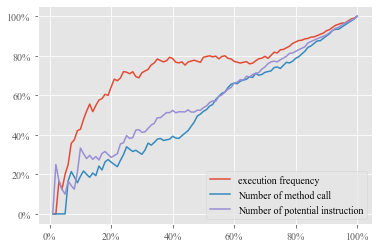

In [26]:
plt.style.use('ggplot')
plt.rc('font', family='Times New Roman')
fig, ax = plt.subplots()
ax.plot(np.linspace(0.01, 1.0, num=100), frequency_hadoop, label="execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_hadoop, label="potential method call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), method_call_hadoop, label="Number of method call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), potential_instruction_hadoop, label="Number of potential instruction", linestyle='-')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.legend(loc="lower right")
plt.show()

In [27]:
plt.style.use('ggplot')
plt.rc('font', family='Times New Roman')
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
# ZooKeeper
axs[0].plot(np.linspace(0.01, 1.0, num=100), frequency_zookeeper, label="Execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_zookeeper, label="potential_method_call", linestyle='-')
axs[0].plot(np.linspace(0.01, 1.0, num=100), method_call_zookeeper, label="Number of method calls", linestyle='-')
axs[0].plot(np.linspace(0.01, 1.0, num=100), potential_instruction_zookeeper, label="Number of potential instructions", linestyle='-')
axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
axs[0].legend(loc="lower right")
axs[0].set_xlabel("TopK", color='black')
axs[0].set_ylabel("Precision", color='black')
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].set_title('(a) TopK precision for ZooKeeper', y=-0.16)

# axs[0].legend(loc="lower right")
# Hadoop
axs[1].plot(np.linspace(0.01, 1.0, num=100), frequency_hadoop, label="Execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_hadoop, label="potential method call", linestyle='-')
axs[1].plot(np.linspace(0.01, 1.0, num=100), method_call_hadoop, label="Number of method calls", linestyle='-')
axs[1].plot(np.linspace(0.01, 1.0, num=100), potential_instruction_hadoop, label="Number of potential instructions", linestyle='-')
axs[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
axs[1].legend(loc="lower right")
axs[1].set_xlabel("TopK", color='black')
axs[1].set_ylabel("Precision", color='black')
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].set_title('(b) TopK precision for Hadoop', y=-0.16)

plt.savefig("E:/TopNPrecision.pdf",  bbox_inches='tight', dpi=300)
plt.show()